# Intro to ATLAS Data

### Lorentz 4-Vector and Invariant Mass

- **Lorentz 4-vectors** are vectors with 4 components. In the context of relativity, they usually associated with space-time 4-vector or energy-momentum 4 vector. The vectors are designed so that their length are invariant under coordinate transformation. The invariant length of space-time 4-vector is associated with the fact that light speed is constant, while the invariant length of energy-momentum 4-vector is associated with the invariant rest mass. Applying Lorentz transformaion to 4-vectors allows alternative perspective of the events from different coordinates.

- **Invariant mass**, or rest mass, is defined in both Newton's law F=ma and in Einstein's equation E=mc^2. It is proportional to the inertia of the object at rest. Invariant mass is important because it can be interpreted as the system's energy at rest. In the study of particle physics, for example, when certain particle decays and no longer exists, its invariant mass can be calculated from the energies and momenta of decay products and vice versa. Such quantity is at the center of interest for physicist to reconstruct the system and study the decay process.

In [31]:
import awkward
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [15]:
#Instead of using dataframes, here uses array structure as suggested in the awkward array documentation.
#A single array is displayed as below.
events = uproot.open("./mc_105986.ZZ.root")["mini"].lazyarrays()
events[0].tolist()

{'runNumber': 195847,
 'eventNumber': 25001,
 'channelNumber': 105986,
 'mcWeight': 1.0,
 'pvxp_n': 6,
 'vxp_z': -166.55519104003906,
 'scaleFactor_PILEUP': 2.1865320205688477,
 'scaleFactor_ELE': 1.0,
 'scaleFactor_MUON': 1.0010457038879395,
 'scaleFactor_BTAG': 1.0,
 'scaleFactor_TRIGGER': 0.9587962627410889,
 'scaleFactor_JVFSF': 1.0,
 'scaleFactor_ZVERTEX': 0.09574773162603378,
 'trigE': False,
 'trigM': True,
 'passGRL': True,
 'hasGoodVertex': True,
 'lep_n': 1,
 'lep_truthMatched': [True],
 'lep_trigMatched': [1],
 'lep_pt': [34132.2890625],
 'lep_eta': [-0.2617584764957428],
 'lep_phi': [0.659946620464325],
 'lep_E': [35308.46875],
 'lep_z0': [-0.09328432381153107],
 'lep_charge': [-1.0],
 'lep_type': [13],
 'lep_flag': [568344575],
 'lep_ptcone30': [0.0],
 'lep_etcone20': [54.29543685913086],
 'lep_trackd0pvunbiased': [0.006909203715622425],
 'lep_tracksigd0pvunbiased': [0.017931267619132996],
 'met_et': 13005.88671875,
 'met_phi': 2.876398801803589,
 'jet_n': 0,
 'alljet_n': 

In [10]:
#Then extract the required the elements
tree1 = events[["lep_n","lep_charge","lep_type","lep_pt","lep_eta","lep_phi","lep_E"]]
tree1.columns

['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E']

As suggested in the ATLAS notebook, there are centain conditions that should be satisfied, 
- At least 2 leptons; 
- leptons should have opposite charge;
- Leptons be in the same family (2 electrons or 2 muons)

After filtering the data, add the 4-vector of lead lepton and trail lepton to get the invariant mass

In [35]:
L4V = []
leadLepton = 0
trailLepton = 0
for x in range(len(tree1)):
    if tree1.lep_n[x] >= 2:
         if (tree1.lep_charge[x][0] != tree1.lep_charge[x][1]):
                if (tree1.lep_type[x][0] == tree1.lep_type[x][1]):
                    pxlead = tree1.lep_pt[x][0]/1000. * math.cos(tree1.lep_phi[x][0])
                    pylead = tree1.lep_pt[x][0]/1000. * math.sin(tree1.lep_phi[x][0])
                    pzlead = tree1.lep_pt[x][0]/1000. * math.sinh(tree1.lep_eta[x][0])
                    Elead = tree1.lep_E[x][0]/1000.
                    pxtail = tree1.lep_pt[x][1]/1000. * math.cos(tree1.lep_phi[x][1])
                    pytail = tree1.lep_pt[x][1]/1000. * math.sin(tree1.lep_phi[x][1])
                    pztail = tree1.lep_pt[x][1]/1000. * math.sinh(tree1.lep_eta[x][1])
                    Etail = tree1.lep_E[x][1]/1000.
                    leadLepton = [pxlead, pylead, pzlead, Elead]
                    trailLepton = [pxtail, pytail, pztail, Etail]
                    L4V.append(np.add(leadLepton, trailLepton))

- Invariant Mass equals square root of the difference between energy square and momentum square

In [37]:
def Invmass(x): 
    mass = np.sqrt(x[3]**2 - x[1]**2 -x[2]**2 - x[0]**2)
    return mass

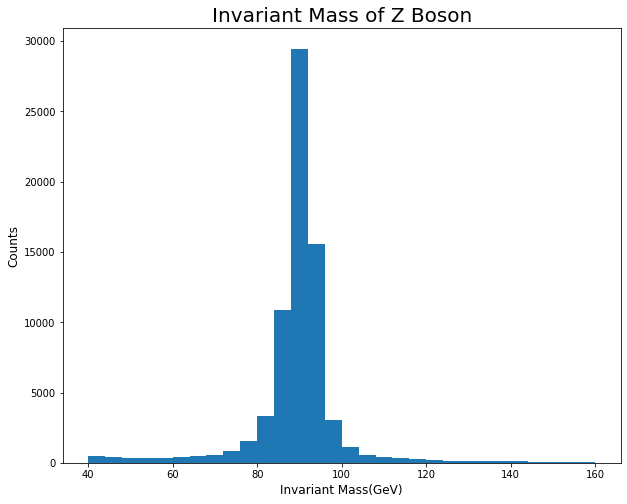

In [49]:
invmass = []
for x in range(len(L4V)):
    invmass.append(Invmass(L4V[x]))
plt.figure(figsize=(10,8))
plt.hist(invmass,range=(40,160),bins=30)
plt.title("Invariant Mass of Z Boson",fontsize=20)
plt.xlabel("Invariant Mass(GeV)",fontsize=12)
plt.ylabel("Counts",fontsize=12)
plt.show()

- Adding the 4 lepton data from the official juypter note

In [57]:
events2 = uproot.open("./mc_361106.Zee.1largeRjet1lep.root")["mini"].lazyarrays()
tree2 = events2[["lep_n","lep_charge","lep_type","lep_pt","lep_eta","lep_phi","lep_E"]]
tree2.columns

['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E']

In [58]:
def Invmassfunc(tree):
    L4V = []
    leadLepton = []
    trailLepton = []
    for x in range(len(tree2)):
        if tree.lep_n[x] >= 2:
             if (tree.lep_charge[x][0] != tree.lep_charge[x][1]):
                    if (tree.lep_type[x][0] == tree.lep_type[x][1]):
                        pxlead = tree.lep_pt[x][0]/1000. * math.cos(tree.lep_phi[x][0])
                        pylead = tree.lep_pt[x][0]/1000. * math.sin(tree.lep_phi[x][0])
                        pzlead = tree.lep_pt[x][0]/1000. * math.sinh(tree.lep_eta[x][0])
                        Elead = tree.lep_E[x][0]/1000.
                        pxtail = tree.lep_pt[x][1]/1000. * math.cos(tree.lep_phi[x][1])
                        pytail = tree.lep_pt[x][1]/1000. * math.sin(tree.lep_phi[x][1])
                        pztail = tree.lep_pt[x][1]/1000. * math.sinh(tree.lep_eta[x][1])
                        Etail = tree.lep_E[x][1]/1000.
                        leadLepton = [pxlead, pylead, pzlead, Elead]
                        trailLepton = [pxtail, pytail, pztail, Etail]
                        L4V.append(np.add(leadLepton, trailLepton))
    invmass = []
    for x in range(len(L4V)):
        invmass.append(Invmass(L4V[x]))
    return invmass

In [59]:
invmass2 = Invmassfunc(tree2)

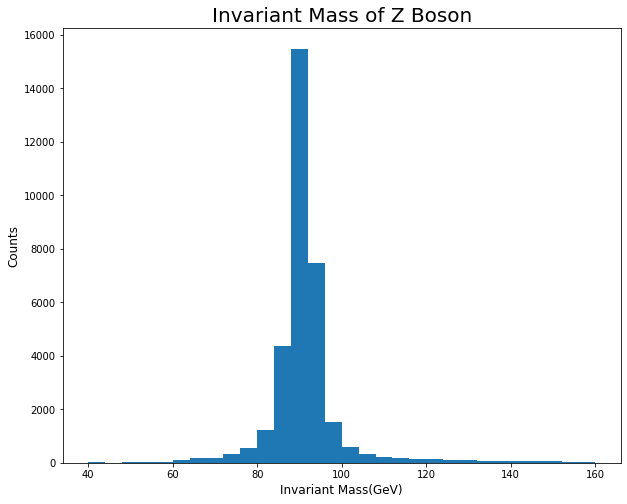

In [60]:
plt.figure(figsize=(10,8))
plt.hist(invmass2,range=(40,160),bins=30)
plt.title("Invariant Mass of Z Boson",fontsize=20)
plt.xlabel("Invariant Mass(GeV)",fontsize=12)
plt.ylabel("Counts",fontsize=12)
plt.show()